
## Necessary Lighbary



In [1]:
########### This is only need for  google colab ##############
##############################################################

!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib
import talib

--2023-04-09 02:47:07--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-04-09 02:47:07--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2023-04-09 02:47:07--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [2]:
import sqlite3
import pandas as pd
import talib
import numpy as np

In [3]:
import matplotlib.pyplot as plt

## Database Connection

In [5]:
# # connection = sqlite3.connect(r"cripto.db")
# connection = sqlite3.connect(r"../database/big_data.db")
# cur = connection.cursor()
# database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Database Connection for google colab

In [6]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
connection = sqlite3.connect(r"/content/drive/My Drive/Data/cripto_one_day.db")
cur = connection.cursor()
database_data = cur.execute("select * from asset order by CloseTime").fetchall()

## Dataframe

In [10]:
df = pd.DataFrame(database_data)
df

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,1351,BTCBUSD,27024.06,27026.74,27024.00,27024.00,2.66505,-0.000222024373840606,1.679994e+12,72023.273212,112.0,0.18810,1679993820
1,595,BTCBUSD,27020.16,27026.84,27015.69,27020.10,12.50202,-0.000222056420100065,1.679949e+12,337789.369997,178.0,10.46836,1679948460
2,1301,BTCBUSD,26987.92,26988.35,26982.52,26987.86,19.41430,-0.000222321690584794,1.679991e+12,523897.314753,141.0,14.05536,1679990820
3,623,BTCBUSD,26990.07,26992.42,26985.95,26989.99,5.27608,-0.000296405307574631,1.679950e+12,142396.438702,133.0,2.75527,1679950140
4,1139,BTCBUSD,26946.39,26949.51,26946.31,26946.31,5.82551,-0.000296885779498138,1.679981e+12,156984.589130,97.0,1.16081,1679981100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1354,BTCBUSD,27026.75,27030.29,27026.74,27026.76,11.63567,3.70003792479647e-05,1.679994e+12,314507.980311,112.0,7.84535,1679994000
1436,1358,BTCBUSD,27021.68,27021.69,27021.68,27021.69,0.84215,3.70073215225674e-05,1.679994e+12,22756.312851,57.0,0.50390,1679994240
1437,1165,BTCBUSD,26937.44,26944.18,26937.44,26937.45,11.96560,3.71230525322275e-05,1.679983e+12,322373.185503,130.0,3.32000,1679982660
1438,1106,BTCBUSD,26928.94,26933.23,26928.93,26928.95,12.27673,3.71347702584553e-05,1.679979e+12,330630.229494,119.0,6.66577,1679979120


## Name Columns

In [11]:
df.columns = ['Id', 'Symbol', 'Open', 'High', 'Low', 'Close', 'VolumeBTC', 'Change', 'CloseTime','VolumeBUSD', 'Trades', 'BuyQuoteVolume', 'Time']
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,CloseTime,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,1351,BTCBUSD,27024.06,27026.74,27024.00,27024.00,2.66505,-0.000222024373840606,1.679994e+12,72023.273212,112.0,0.18810,1679993820
1,595,BTCBUSD,27020.16,27026.84,27015.69,27020.10,12.50202,-0.000222056420100065,1.679949e+12,337789.369997,178.0,10.46836,1679948460
2,1301,BTCBUSD,26987.92,26988.35,26982.52,26987.86,19.41430,-0.000222321690584794,1.679991e+12,523897.314753,141.0,14.05536,1679990820
3,623,BTCBUSD,26990.07,26992.42,26985.95,26989.99,5.27608,-0.000296405307574631,1.679950e+12,142396.438702,133.0,2.75527,1679950140
4,1139,BTCBUSD,26946.39,26949.51,26946.31,26946.31,5.82551,-0.000296885779498138,1.679981e+12,156984.589130,97.0,1.16081,1679981100
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1354,BTCBUSD,27026.75,27030.29,27026.74,27026.76,11.63567,3.70003792479647e-05,1.679994e+12,314507.980311,112.0,7.84535,1679994000
1436,1358,BTCBUSD,27021.68,27021.69,27021.68,27021.69,0.84215,3.70073215225674e-05,1.679994e+12,22756.312851,57.0,0.50390,1679994240
1437,1165,BTCBUSD,26937.44,26944.18,26937.44,26937.45,11.96560,3.71230525322275e-05,1.679983e+12,322373.185503,130.0,3.32000,1679982660
1438,1106,BTCBUSD,26928.94,26933.23,26928.93,26928.95,12.27673,3.71347702584553e-05,1.679979e+12,330630.229494,119.0,6.66577,1679979120


# Make a Candle plot

In [12]:
df = df.set_index('CloseTime')
df.index = pd.to_datetime(df.index, unit='ms')
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
CloseTime,,,,,,,,,,,,
2023-03-28 08:57:59.999000064,1351,BTCBUSD,27024.06,27026.74,27024.00,27024.00,2.66505,-0.000222024373840606,72023.273212,112.0,0.18810,1679993820
2023-03-27 20:21:59.999000064,595,BTCBUSD,27020.16,27026.84,27015.69,27020.10,12.50202,-0.000222056420100065,337789.369997,178.0,10.46836,1679948460
2023-03-28 08:07:59.999000064,1301,BTCBUSD,26987.92,26988.35,26982.52,26987.86,19.41430,-0.000222321690584794,523897.314753,141.0,14.05536,1679990820
2023-03-27 20:49:59.999000064,623,BTCBUSD,26990.07,26992.42,26985.95,26989.99,5.27608,-0.000296405307574631,142396.438702,133.0,2.75527,1679950140
2023-03-28 05:25:59.999000064,1139,BTCBUSD,26946.39,26949.51,26946.31,26946.31,5.82551,-0.000296885779498138,156984.589130,97.0,1.16081,1679981100
...,...,...,...,...,...,...,...,...,...,...,...,...
2023-03-28 09:00:59.999000064,1354,BTCBUSD,27026.75,27030.29,27026.74,27026.76,11.63567,3.70003792479647e-05,314507.980311,112.0,7.84535,1679994000
2023-03-28 09:04:59.999000064,1358,BTCBUSD,27021.68,27021.69,27021.68,27021.69,0.84215,3.70073215225674e-05,22756.312851,57.0,0.50390,1679994240
2023-03-28 05:51:59.999000064,1165,BTCBUSD,26937.44,26944.18,26937.44,26937.45,11.96560,3.71230525322275e-05,322373.185503,130.0,3.32000,1679982660


# Make a Custom Pattern

In [13]:
df = df.reset_index(drop=True)
df

,Id,Symbol,Open,High,Low,Close,VolumeBTC,Change,VolumeBUSD,Trades,BuyQuoteVolume,Time
0,1351,BTCBUSD,27024.06,27026.74,27024.00,27024.00,2.66505,-0.000222024373840606,72023.273212,112.0,0.18810,1679993820
1,595,BTCBUSD,27020.16,27026.84,27015.69,27020.10,12.50202,-0.000222056420100065,337789.369997,178.0,10.46836,1679948460
2,1301,BTCBUSD,26987.92,26988.35,26982.52,26987.86,19.41430,-0.000222321690584794,523897.314753,141.0,14.05536,1679990820
3,623,BTCBUSD,26990.07,26992.42,26985.95,26989.99,5.27608,-0.000296405307574631,142396.438702,133.0,2.75527,1679950140
4,1139,BTCBUSD,26946.39,26949.51,26946.31,26946.31,5.82551,-0.000296885779498138,156984.589130,97.0,1.16081,1679981100
...,...,...,...,...,...,...,...,...,...,...,...,...
1435,1354,BTCBUSD,27026.75,27030.29,27026.74,27026.76,11.63567,3.70003792479647e-05,314507.980311,112.0,7.84535,1679994000
1436,1358,BTCBUSD,27021.68,27021.69,27021.68,27021.69,0.84215,3.70073215225674e-05,22756.312851,57.0,0.50390,1679994240
1437,1165,BTCBUSD,26937.44,26944.18,26937.44,26937.45,11.96560,3.71230525322275e-05,322373.185503,130.0,3.32000,1679982660
1438,1106,BTCBUSD,26928.94,26933.23,26928.93,26928.95,12.27673,3.71347702584553e-05,330630.229494,119.0,6.66577,1679979120


# Calculating RSI

In [14]:
df['rsi'] = talib.RSI(df['Close'], timeperiod=5)

# Generate signals
df['rsisignal'] = 0
df.loc[df['rsi'] > 70, 'rsisignal'] = -100
df.loc[df['rsi'] < 30, 'rsisignal'] = 100

print(df['rsisignal'].to_string())


0         0
1         0
2         0
3         0
4         0
5         0
6         0
7         0
8         0
9      -100
10        0
11        0
12        0
13        0
14        0
15        0
16        0
17     -100
18        0
19        0
20        0
21        0
22        0
23        0
24        0
25        0
26        0
27        0
28        0
29        0
30        0
31        0
32        0
33        0
34        0
35        0
36     -100
37     -100
38        0
39        0
40        0
41        0
42        0
43        0
44        0
45        0
46        0
47        0
48        0
49        0
50        0
51        0
52        0
53        0
54        0
55        0
56        0
57        0
58        0
59        0
60     -100
61        0
62        0
63        0
64        0
65        0
66        0
67        0
68        0
69        0
70        0
71        0
72        0
73        0
74        0
75        0
76        0
77        0
78        0
79        0
80        0
81        0
82        0
83  

# Addig candlestick patterns

In [15]:
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
print(results)
print(cols)

[0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3       0
4       0
       ..
1435    0
1436    0
1437    0
1438    0
1439    0
Length: 1440, dtype: int32, 0       0
1       0
2       0
3  

In [16]:
patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns['rsi'] = df['rsisignal']
patterns["Sum"] = patterns.sum(axis=1)
patterns

,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,CDLBELTHOLD,...,CDLSTICKSANDWICH,CDLTAKURI,CDLTASUKIGAP,CDLTHRUSTING,CDLTRISTAR,CDLUNIQUE3RIVER,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,rsi,Sum
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,400
1436,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,200
1437,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,500
1438,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,400


In [17]:
df = df.drop(['Symbol', 'Id', 'Time'], axis=1)

## Combine two Dataframe

In [18]:
df = df.astype(float)

In [19]:
df = df.add(patterns, fill_value=0)
df

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,Close,High,Low,Open,Sum,Trades,VolumeBTC,VolumeBUSD,rsi,rsisignal
0,0.18810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27024.00,27026.74,27024.00,27024.06,0.0,112.0,2.66505,72023.273212,0.000000,0.0
1,10.46836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27020.10,27026.84,27015.69,27020.16,0.0,178.0,12.50202,337789.369997,0.000000,0.0
2,14.05536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26987.86,26988.35,26982.52,26987.92,0.0,141.0,19.41430,523897.314753,0.000000,0.0
3,2.75527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26989.99,26992.42,26985.95,26990.07,0.0,133.0,5.27608,142396.438702,0.000000,0.0
4,1.16081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26946.31,26949.51,26946.31,26946.39,0.0,97.0,5.82551,156984.589130,0.000000,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,7.84535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27026.76,27030.29,27026.74,27026.75,400.0,112.0,11.63567,314507.980311,42.457844,0.0
1436,0.50390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,27021.69,27021.69,27021.68,27021.68,200.0,57.0,0.84215,22756.312851,42.318963,0.0
1437,3.32000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26937.45,26944.18,26937.44,26937.44,500.0,130.0,11.96560,322373.185503,39.626824,0.0
1438,6.66577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,26928.95,26933.23,26928.93,26928.94,400.0,119.0,12.27673,330630.229494,39.311403,0.0


## Make a plot to see the sum

0          0
1          0
2          0
3          0
4          0
        ... 
1435     800
1436     400
1437    1000
1438     800
1439    1000
Length: 1440, dtype: int64


<Axes: >

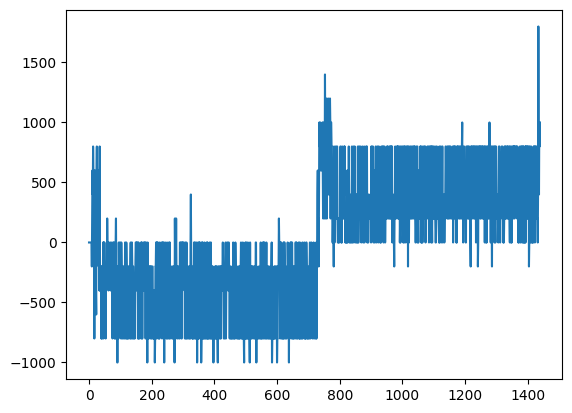

In [20]:
all_pats = patterns.sum(axis=1)
print(all_pats)
all_pats.plot()

## X paramiter for feeding Model

In [21]:
X = df.drop(['Sum','rsi','rsisignal'], axis=1)
X

,BuyQuoteVolume,CDL2CROWS,CDL3BLACKCROWS,CDL3INSIDE,CDL3LINESTRIKE,CDL3OUTSIDE,CDL3STARSINSOUTH,CDL3WHITESOLDIERS,CDLABANDONEDBABY,CDLADVANCEBLOCK,...,CDLUPSIDEGAP2CROWS,CDLXSIDEGAP3METHODS,Change,Close,High,Low,Open,Trades,VolumeBTC,VolumeBUSD
0,0.18810,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000222,27024.00,27026.74,27024.00,27024.06,112.0,2.66505,72023.273212
1,10.46836,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000222,27020.10,27026.84,27015.69,27020.16,178.0,12.50202,337789.369997
2,14.05536,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000222,26987.86,26988.35,26982.52,26987.92,141.0,19.41430,523897.314753
3,2.75527,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000296,26989.99,26992.42,26985.95,26990.07,133.0,5.27608,142396.438702
4,1.16081,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.000297,26946.31,26949.51,26946.31,26946.39,97.0,5.82551,156984.589130
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1435,7.84535,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000037,27026.76,27030.29,27026.74,27026.75,112.0,11.63567,314507.980311
1436,0.50390,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000037,27021.69,27021.69,27021.68,27021.68,57.0,0.84215,22756.312851
1437,3.32000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000037,26937.45,26944.18,26937.44,26937.44,130.0,11.96560,322373.185503
1438,6.66577,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.000037,26928.95,26933.23,26928.93,26928.94,119.0,12.27673,330630.229494


## Y paramiter for feedind Model

In [22]:
y = df['Sum']
y

0         0.0
1         0.0
2         0.0
3         0.0
4         0.0
        ...  
1435    400.0
1436    200.0
1437    500.0
1438    400.0
1439    500.0
Name: Sum, Length: 1440, dtype: float64

## Model for AI Research

In [23]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =  train_test_split(X, y, test_size=0.1)

## Use Tensorflow

In [24]:
X_train.shape

(1296, 70)

In [25]:
len(X_train)

1296

In [26]:
y_train.shape

(1296,)

In [27]:
import joblib

In [28]:
import tensorflow as tf
model = tf.keras.models.Sequential()

In [29]:
model.add(tf.keras.layers.Dense(512, activation='relu'))
model.add(tf.keras.layers.Dense(256, activation='relu'))
model.add(tf.keras.layers.Dense(128, activation='relu'))
model.add(tf.keras.layers.Dense(64, activation='relu'))
model.add(tf.keras.layers.Dense(32, activation='relu'))
model.add(tf.keras.layers.Dense(16, activation='relu'))
model.add(tf.keras.layers.Dense(8, activation='relu'))
model.add(tf.keras.layers.Dense(4, activation='relu'))
model.add(tf.keras.layers.Dense(2, activation='relu'))
model.add(tf.keras.layers.Dense(1))


In [30]:
model.compile(optimizer='adam', loss='mean_squared_error', metrics=['accuracy'])

In [31]:
model.fit(X_train,y_train, epochs=500, batch_size=100000)

Epoch 1/500
1/1 [==============================] - 2s 2s/step - loss: 70331.7891 - accuracy: 0.1713
Epoch 2/500
1/1 [==============================] - 0s 64ms/step - loss: 70331.7812 - accuracy: 0.1713
Epoch 3/500
1/1 [==============================] - 0s 49ms/step - loss: 70331.7656 - accuracy: 0.1713
Epoch 4/500
1/1 [==============================] - 0s 45ms/step - loss: 70331.7656 - accuracy: 0.1713
Epoch 5/500
1/1 [==============================] - 0s 46ms/step - loss: 70331.7500 - accuracy: 0.1713
Epoch 6/500
1/1 [==============================] - 0s 59ms/step - loss: 70331.7422 - accuracy: 0.1713
Epoch 7/500
1/1 [==============================] - 0s 46ms/step - loss: 70331.7344 - accuracy: 0.1713
Epoch 8/500
1/1 [==============================] - 0s 52ms/step - loss: 70331.7266 - accuracy: 0.1713
Epoch 9/500
1/1 [==============================] - 0s 46ms/step - loss: 70331.7188 - accuracy: 0.1713
Epoch 10/500
1/1 [==============================] - 0s 47ms/step - loss: 70331.7031 

In [32]:

# model = model.fit(X_train, y_train)
joblib.dump(model, "btcbusd_trand_predictor_tf.joblib")

['btcbusd_trand_predictor_tf.joblib']

In [33]:
model = joblib.load("btcbusd_trand_predictor_tf.joblib")

In [34]:
predictions = model.predict(X_test)
predictions[:10]

5/5 [==============================] - 0s 3ms/step


array([[0.4877172],
       [0.4877172],
       [0.4877172],
       [0.4877172],
       [0.4877172],
       [0.4877172],
       [0.4877172],
       [0.4877172],
       [0.4877172],
       [0.4877172]], dtype=float32)

In [35]:
# Define the target values
targets = np.arange(-3000, 3001, 100)
# Calculate the closest target value to each element in the array
closest_target = np.array([targets[np.abs(targets - val).argmin()] for val in predictions])

In [36]:
closest_target[20:30]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [37]:
y_test[20:30]

527    -400.0
1300    200.0
230    -100.0
414    -400.0
1396    400.0
1362    400.0
1315    300.0
423    -200.0
776     200.0
288    -400.0
Name: Sum, dtype: float64

# TODO : ⏰  Need to Fixed

In [40]:
from dataframe import GetDataframe
symbol = "BTCBUSD"

df = GetDataframe().get_minute_data(symbol, 1, 5)
df = df.iloc[:,0:10]
df.astype(float)
# df = df.drop(columns=['symbol','VolumeBUSD', 'CloseTime'])
# df = df.iloc[0]
# print(df)
results = []
cols = []
for attr in dir(talib):
    if attr[:3]=='CDL':
#         print(getattr(talib, attr))
        res = getattr(talib, attr)(df['Open'], df['High'], df['Low'],
                                         df['Close'])
        results.append(res)
        cols.append(attr)
# print(results)
# print(cols)

patterns = pd.DataFrame(results).T
patterns.columns = cols
patterns.astype(float)
patterns["Sum"] = patterns.sum(axis=1)
patterns
df = df.add(patterns, fill_value=0)
df = df.drop(['CloseTime', 'Sum'], axis=1)
df = df.iloc[-2]
# print(df)
pred = model.predict(pd.DataFrame(df).transpose())
print(pred[0][0])

In [ ]:
print(pred[0]>=-100)

[ True]
